Reference: https://qiita.com/sasayabaku/items/b7872a3b8acc7d6261bf  
  
LSTMの学習を倍の長さでしてみる

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sin(x, T=100):
    return np.sin(2.0 * np.pi * x / T)

In [3]:
# sin波にノイズを付与する
def toy_problem(T=100, ampl=0.05):
    x = np.arange(0, 2 * T + 1)
    noise = ampl * np.random.uniform(low=-1.0, high=1.0, size=len(x))
    return sin(x) + noise

In [4]:
f = toy_problem()

In [28]:
def make_dataset(low_data, n_prev=100, maxlen=25):
    data, target = [], []

    for i in range(len(low_data)-maxlen):
        data.append(low_data[i:i + maxlen])
        target.append(low_data[i + maxlen])

    re_data = np.array(data).reshape(len(data), maxlen, 1)
    re_target = np.array(target).reshape(len(data), 1)

    return re_data, re_target

In [29]:
# 300周期 (601サンプル)にデータに拡張
f = toy_problem(T=300)

# 50サンプルごとに分割
g, h = make_dataset(f, maxlen=50)

In [30]:
print(g.shape)
g

(551, 50, 1)


array([[[ 0.00197742],
        [ 0.02982977],
        [ 0.17405911],
        ...,
        [ 0.17655364],
        [ 0.12215867],
        [ 0.06092078]],

       [[ 0.02982977],
        [ 0.17405911],
        [ 0.16278356],
        ...,
        [ 0.12215867],
        [ 0.06092078],
        [-0.01930464]],

       [[ 0.17405911],
        [ 0.16278356],
        [ 0.21002719],
        ...,
        [ 0.06092078],
        [-0.01930464],
        [-0.09568805]],

       ...,

       [[ 0.14052713],
        [ 0.08907086],
        [-0.03289377],
        ...,
        [-0.31116241],
        [-0.28137231],
        [-0.15060101]],

       [[ 0.08907086],
        [-0.03289377],
        [-0.07712029],
        ...,
        [-0.28137231],
        [-0.15060101],
        [-0.12351571]],

       [[-0.03289377],
        [-0.07712029],
        [-0.16503179],
        ...,
        [-0.15060101],
        [-0.12351571],
        [-0.10952135]]])

In [31]:
print(h.shape)
h

(551, 1)


array([[-0.01930464],
       [-0.09568805],
       [-0.15673131],
       [-0.16151204],
       [-0.26910113],
       [-0.34283854],
       [-0.40103418],
       [-0.41934085],
       [-0.50080905],
       [-0.51748009],
       [-0.62552977],
       [-0.64509079],
       [-0.66748612],
       [-0.71453673],
       [-0.76971347],
       [-0.85140772],
       [-0.82060014],
       [-0.9173481 ],
       [-0.91213123],
       [-0.93199136],
       [-0.9896728 ],
       [-0.9844958 ],
       [-1.01293048],
       [-1.02231411],
       [-1.03102516],
       [-1.01528477],
       [-1.03835604],
       [-0.97756755],
       [-0.98970064],
       [-0.96083865],
       [-1.00095477],
       [-0.94246004],
       [-0.9243644 ],
       [-0.91424359],
       [-0.87563251],
       [-0.85586298],
       [-0.81865205],
       [-0.68091079],
       [-0.69987467],
       [-0.66881384],
       [-0.59541111],
       [-0.50813619],
       [-0.45297102],
       [-0.44720626],
       [-0.40682077],
       [-0

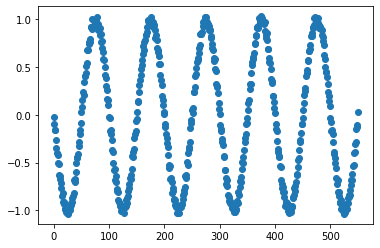

In [32]:
#h.reshape(h.shape[0])
#[i for i in range(h.shape[0])]

plt.scatter([i for i in range(h.shape[0])], h.reshape(h.shape[0]))

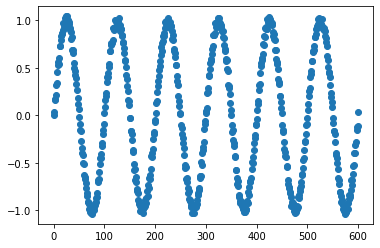

In [33]:
plt.scatter([i for i in range(len(f))], f)

### モデル構築

In [34]:
# 1つの学習データのStep数(今回は25)
length_of_sequence = g.shape[1] 
in_out_neurons = 1
n_hidden = 300

In [35]:
model = Sequential()

model.add(LSTM(n_hidden, batch_input_shape=(None, length_of_sequence, in_out_neurons), return_sequences=False))
model.add(Dense(in_out_neurons))
model.add(Activation("linear"))

optimizer = Adam(lr=0.001)

model.compile(loss="mean_squared_error", optimizer=optimizer)

In [36]:
early_stopping = EarlyStopping(monitor='val_loss', mode='auto', patience=20)

hist = model.fit(g, h,
                 batch_size=300,
                 epochs=100,
                 validation_split=0.1,
                 callbacks=[early_stopping])

Epoch 1/100
2/2 [==============================] - 1s 264ms/step - loss: 0.4259 - val_loss: 0.1490
Epoch 2/100
2/2 [==============================] - 0s 119ms/step - loss: 0.1526 - val_loss: 0.1119
Epoch 3/100
2/2 [==============================] - 0s 115ms/step - loss: 0.0835 - val_loss: 0.0365
Epoch 4/100
2/2 [==============================] - 0s 116ms/step - loss: 0.0296 - val_loss: 0.0247
Epoch 5/100
2/2 [==============================] - 0s 116ms/step - loss: 0.0281 - val_loss: 0.0146
Epoch 6/100
2/2 [==============================] - 0s 118ms/step - loss: 0.0155 - val_loss: 0.0017
Epoch 7/100
2/2 [==============================] - 0s 117ms/step - loss: 0.0032 - val_loss: 0.0110
Epoch 8/100
2/2 [==============================] - 0s 117ms/step - loss: 0.0102 - val_loss: 0.0031
Epoch 9/100
2/2 [==============================] - 0s 115ms/step - loss: 0.0044 - val_loss: 0.0106
Epoch 10/100
2/2 [==============================] - 0s 117ms/step - loss: 0.0082 - val_loss: 0.0046
Epoch 11/

<AxesSubplot:>

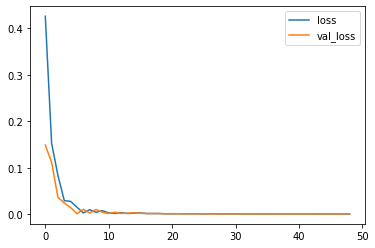

In [37]:
import pandas as pd

results = pd.DataFrame(hist.history)
results[['loss', 'val_loss']].plot()

### 予測

In [38]:
predicted = model.predict(g)

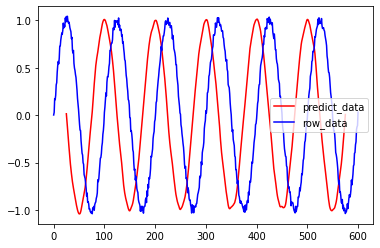

In [39]:
plt.figure()
plt.plot(range(25,len(predicted)+25), predicted, color="r", label="predict_data")
plt.plot(range(0, len(f)), f, color="b", label="row_data")
plt.legend()
plt.show()

### 未来の予測

In [40]:
future_test = g[-1].T

In [41]:
print(future_test.shape)
future_test

(1, 50)


array([[-0.03289377, -0.07712029, -0.16503179, -0.16366675, -0.20238344,
        -0.28411785, -0.39262115, -0.41568726, -0.45021154, -0.50009143,
        -0.56207586, -0.66543735, -0.72501474, -0.6861697 , -0.81043355,
        -0.80546179, -0.84940124, -0.91801621, -0.92817385, -0.88793657,
        -0.98563411, -0.94847493, -1.00714491, -0.98028512, -0.98408938,
        -1.03608917, -1.01687617, -1.01698074, -0.98665456, -0.93334702,
        -0.98419998, -0.9284748 , -0.87633161, -0.83703443, -0.86341361,
        -0.83920616, -0.78828313, -0.68416541, -0.73402907, -0.68250716,
        -0.6219279 , -0.53412171, -0.5217538 , -0.40173243, -0.39375004,
        -0.31116241, -0.28137231, -0.15060101, -0.12351571, -0.10952135]])

In [42]:
# 1つの学習データの時間の長さ -> 25
time_length = future_test.shape[1]

# 未来の予測データを保存していく変数
future_result = np.empty((1))

# 未来予想
for step2 in range(400):
    test_data = np.reshape(future_test, (1, time_length, 1))
    batch_predict = model.predict(test_data)

    future_test = np.delete(future_test, 0)
    future_test = np.append(future_test, batch_predict)

    future_result = np.append(future_result, batch_predict)

In [43]:
#future_result

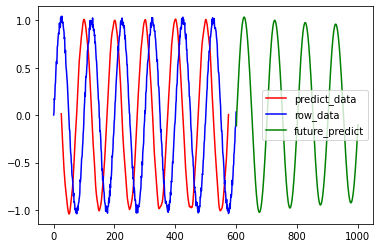

In [44]:
# sin波をプロット
plt.figure()
plt.plot(range(25,len(predicted)+25), predicted, color="r", label="predict_data")
plt.plot(range(0, len(f)), f, color="b", label="row_data")
plt.plot(range(0+len(f), len(future_result)+len(f)), future_result, color="g", label="future_predict")
plt.legend()
plt.show()